In [1]:
import os
import sys
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def scaleImageNN(image, sx, sy):
    """
    Consider the image to be a numoy array
    sx, sy contains resizing information for x and y axis.
    intepolationType tells which type of interpolation to use - Nearest Neighbors / Bilinear
    
    """
    newImage = np.zeros_like(image)
    scale = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    inv_scale = np.linalg.inv(scale)
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_scale,point)
            a = int(new_point[0][0])
            b = int(new_point[1][0])
            #check if new image coordinates are present in the image
            if a < image.shape[0] and b < image.shape[1]:
            #if a > 0 and a < image.shape[0] and b > 0 and b < image.shape[1]:
                newImage[x][y] = image[a][b]
    return newImage

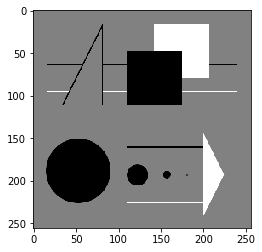

In [3]:
img = cv2.imread('edges-lines-orig.png',0)
plt.imshow(img,cmap='gray')

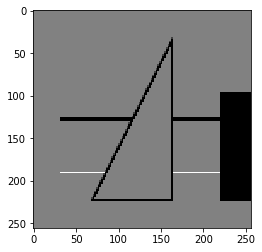

In [4]:
newScaledImage = scaleImageNN(img,2,2)
plt.imshow(newScaledImage,cmap='gray')

In [5]:
def translateImageNN(image,tx, ty):
    newImage = np.zeros_like(image)
    translate = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
    inv_translate = np.linalg.inv(translate)
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_translate,point)
            a = int(new_point[0][0])
            b = int(new_point[1][0])
            #check if new image coordinates are present in the image
            if a > 0 and a < image.shape[0] and b > 0 and b < image.shape[1]:
                newImage[x][y] = image[a][b]
    return newImage

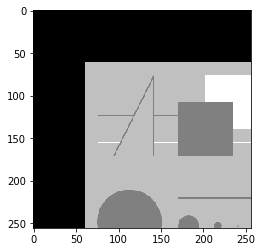

In [6]:
newTranslatedImage = translateImageNN(img,60,60)
plt.imshow(newTranslatedImage,cmap ='gray')

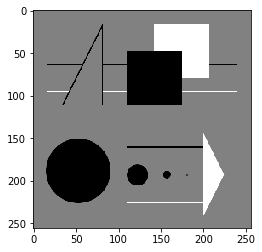

In [7]:
plt.imshow(img,cmap='gray')

In [8]:
def rotateImageNN(image, degreeTheta):
    radians = math.radians(degreeTheta)
    sinTheta = math.sin(radians)
    cosTheta = math.cos(radians)
    newImage = np.zeros_like(image)
    rotate = np.array([[cosTheta,-sinTheta,0],[sinTheta,cosTheta,0],[0,0,1]])
    inv_rotate = np.linalg.inv(rotate)
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_rotate,point)
            a = int(new_point[0][0])
            b = int(new_point[1][0])
            #check if new image coordinates are present in the image
            if a > 0 and a < image.shape[0] and b > 0 and b < image.shape[1]:
            #if a < image.shape[0] and b < image.shape[1]:
                newImage[x][y] = 2*image[a][b]
    return newImage

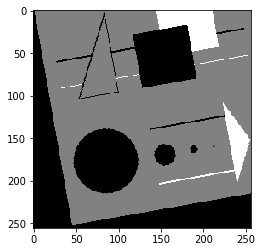

In [9]:
newRotatedImage = rotateImageNN(img,10)
plt.imshow(newRotatedImage,cmap='gray')

In [10]:
def scaleBilinearTransformation(image, sx, sy):
    newImage = np.zeros_like(image)
    scale = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    inv_scale = np.linalg.inv(scale)
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_scale,point)
            a,b = new_point[0][0] , new_point[1][0]
            xc,xf = int(math.ceil(a)),int(math.floor(a))
            yc,yf = int(math.ceil(b)),int(math.floor(b))
            if xc == xf and yc == yf:
                intensity = image[xc,yc]
            elif xc == xf:
                intensity = image[xc, yc] * (b - yf) + image[xc, yf] * (yc - b)
            elif yc == yf:
                 intensity = image[xc, yc] * (a - xf) + image[xf, yc] * (xc - a)
            else :
                intensity = image[xf, yf] * ((xc - x) * (yc - y)) +\
                        image[xf, yc] * ((xc - x) * (y - yf)) +\
                        image[xc, yf] * ((x - xf) * (yc - y)) +\
                        image[xc, yc] * ((x - xf) * (y - yf))
            newImage[x][y] = 2*intensity
    return newImage

In [11]:
scaledimgBL = scaleBilinearTransformation(img,2,2)

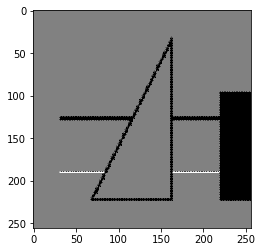

In [12]:
plt.imshow(scaledimgBL,cmap='gray')

In [13]:
def translateBilinearTransformation(image, tx, ty):
    newImage = np.zeros_like(image)
    translate = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
    inv_translate = np.linalg.inv(translate)
    intensity = 0
    row , col = image.shape[0] , image.shape[1]
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_translate,point)
            a,b = new_point[0][0] , new_point[1][0]
            if a < 0 or b < 0:
                continue
            xc,xf = int(math.ceil(a)),int(math.floor(a))
            yc,yf = int(math.ceil(b)),int(math.floor(b))
            if ((xc < row and xc > 0) and (yc < col and yc > 0) and (xf > 0 and xf < row) and (yf > 0 and yf < col)):
                if xc == xf and yc == yf:
                    intensity = image[xc,yc]
                elif xc == xf:
                    intensity = image[xc, yc] * (b - yf) + image[xc, yf] * (yc - b)
                elif yc == yf:
                    intensity = image[xc, yc] * (a - xf) + image[xf, yc] * (xc - a)
                else :
                    intensity = image[xf, yf] * (math.abs(xc - x) * math.abs(yc - y)) +\
                    image[xf, yc] * ((xc - x) * (y - yf)) +\
                    image[xc, yf] * ((x - xf) * (yc - y)) +\
                    image[xc, yc] * ((x - xf) * (y - yf))
            newImage[x][y] = 2*intensity
    return newImage

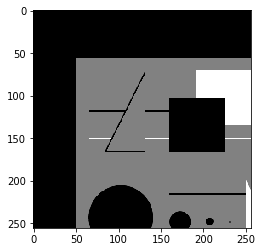

In [14]:
translatedimgBL = translateBilinearTransformation(img,55,50)
plt.imshow(translatedimgBL,cmap='gray')

In [15]:
def rotateBilinearTransformation(image, degreeTheta):
    newImage = np.zeros_like(image)
    radians = math.radians(degreeTheta)
    sinTheta = math.sin(radians)
    cosTheta = math.cos(radians)
    newImage = np.zeros_like(image)
    rotate = np.array([[cosTheta,-sinTheta,0],[sinTheta,cosTheta,0],[0,0,1]])
    inv_rotate = np.linalg.inv(rotate)
    intensity = 0
    row , col = image.shape[0] , image.shape[1]
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_rotate,point)
            a,b = new_point[0][0] , new_point[1][0]
            if a < 0 or b < 0:
                continue
            xc,xf = int(math.ceil(a)),int(math.floor(a))
            yc,yf = int(math.ceil(b)),int(math.floor(b))
            if ((xc < row and xc > 0) and (yc < col and yc > 0) and (xf > 0 and xf < row) and (yf > 0 and yf < col)):
                if xc == xf and yc == yf:
                    intensity = image[xc,yc]
                elif xc == xf:
                    intensity = image[xc, yc] * (b - yf) + image[xc, yf] * (yc - b)
                elif yc == yf:
                    intensity = image[xc, yc] * (a - xf) + image[xf, yc] * (xc - a)
                else :
                    intensity = image[xf, yf] * ((xc - x) * (yc - y)) +\
                    image[xf, yc] * ((xc - x) * (y - yf)) +\
                    image[xc, yf] * ((x - xf) * (yc - y)) +\
                    image[xc, yc] * ((x - xf) * (y - yf))
            newImage[x][y] = 2*intensity
    return newImage

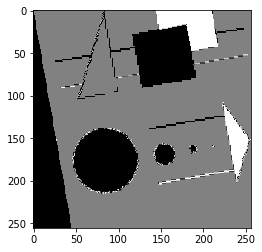

In [16]:
roatatedImgBL = rotateBilinearTransformation(img, 10)
plt.imshow(roatatedImgBL,cmap = 'gray')

In [17]:
def getCoordintes(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y

In [18]:
test_img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',getCoordintes)

In [19]:
def pprint(A):
    n = len(A)
    for i in range(0, n):
        line = ""
        for j in range(0, n+1):
            line += str(A[i][j]) + "\t"
            if j == n-1:
                line += "| "
        print(line)
    print("")


def gauss(A):
    n = len(A)

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k][i]/A[i][i]
            for j in range(i, n+1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = A[i][n]/A[i][i]
        for k in range(i-1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return x

In [20]:
# Test gauss elimination method
#matrixToSolve = np.array([[2.0,1.0,-1.0,8.0],[-3.0,-1.0,2.0,-11.0],[-2.0,1.0,2.0,-3.0]])
#matrixToSolve = np.array([[1.0,2.0,3.0,1.0],[4.0,5.0,6.0,1.0],[1.0,0,1.0,1.0]])
#gauss(matrixToSolve)

In [21]:
X = np.array([[2,1,-1],[-3,-1,2],[-2,1,2]])
#X = np.array([[2,3,-2],[1,-1,1],[-1,2,2]])
y = np.array([8,-11,-3])
ans = np.linalg.solve(X,y)

In [22]:
def calculateAffineMatrix(X,Y):
    return np.linalg.solve(X,Y)

In [23]:
matrixToSolve = np.array([[49,108,1,0,0,0],[0,0,0,49,108,1],[178, 107,1,0,0,0],[0,0,0,178, 107,1],[104,  25,1,0,0,0],[0,0,0,104,  25,1]])
Y = np.array([[180],[107],[46],[112],[123],[200]])
ans = np.linalg.solve(matrixToSolve,Y)
print ans
#ans = np.dot(np.linalg.inv(matrixToSolve),Y)
#print ans

[[ -1.03877206e+00]
 [ -1.59594442e-03]
 [  2.31072193e+02]
 [  3.02290650e-02]
 [ -1.10045062e+00]
 [  2.24367443e+02]]


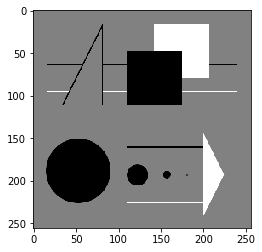

In [24]:
# lets assume three points in the source and target image.
plt.imshow(img,cmap = 'gray')

In [25]:
brain_up = cv2.imread('brain_up.jpeg',0)
#brain_down = cv2.imread('brain_down.jpeg',0)

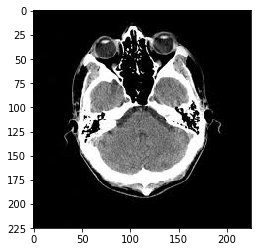

In [26]:
plt.imshow(brain_up,cmap = 'gray')

In [27]:
#plt.imshow(brain_down,cmap='gray')

In [28]:
def affineTransformation(image,affine_matrix):
    newImage = np.zeros_like(image)
    #scale = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    inv_affine_matrix = np.linalg.inv(affine_matrix)
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            point = np.array([[x],[y],[1]])
            new_point = np.matmul(inv_affine_matrix,point)
            a = int(new_point[0][0])
            b = int(new_point[1][0])
            #check if new image coordinates are present in the image
            #if a < image.shape[0] and b < image.shape[1]:
            if a > 0 and a < image.shape[0] and b > 0 and b < image.shape[1]:
                newImage[x][y] = image[a][b]
    return newImage

In [29]:
#matrixToSolve = np.array([[105,27,1,0,0,0],[0,0,0,105,27,1],[54,109,1,0,0,0],[0,0,0,54,109,1],[168,100,1,0,0,0],[0,0,0,168,100,1]])
#Y = np.array([[51],[109],[176],[104],[123],[199]])
matrixToSolve = np.array([[49,108,1,0,0,0],[0,0,0,49,108,1],[178,107,1,0,0,0],[0,0,0,178,107,1],[104,25,1,0,0,0],[0,0,0,104,25,1]])
Y = np.array([[180],[107],[46],[112],[123],[200]])
ans = np.linalg.solve(matrixToSolve,Y)
print ans

[[ -1.03877206e+00]
 [ -1.59594442e-03]
 [  2.31072193e+02]
 [  3.02290650e-02]
 [ -1.10045062e+00]
 [  2.24367443e+02]]


[[ -1.03877206e+00  -1.59594442e-03   2.31072193e+02]
 [  3.02290650e-02  -1.10045062e+00   2.24367443e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


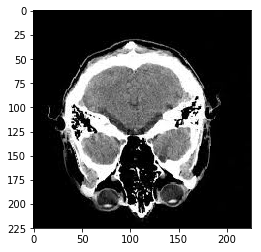

In [30]:
t_matrix = np.array([[ans[0][0],ans[1][0],ans[2][0]],[ ans[3][0],ans[4][0],  ans[5][0]],[0,0,1]])
print t_matrix
affine_image = affineTransformation(brain_up,t_matrix)
plt.imshow(affine_image,cmap = 'gray')

# Hough Transform

In [31]:
def convolve2d(image, kernel, kernelsize):
    """
    This function assumes square kernels for now.
    """
    assert kernelsize%2 == 1 #this step is important
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + kernelsize - 1, image.shape[1] + kernelsize - 1))
    skipfactor = (kernelsize-1)/2
    image_padded[skipfactor:-skipfactor, skipfactor:-skipfactor] = image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x,y]=(kernel*image_padded[x:x+kernelsize,y:y+kernelsize]).sum()
    return output

In [32]:
yderiv = np.array([[0,-0.5,0],[0,0,0],[0,0.5,0]])
xderiv = np.array([[0,0,0],[-0.5,0,0.5],[0,0,0]])

In [33]:
# Calculation of Edge Map
def calculateEdgeMap(xderiv,yderiv):
    assert xderiv.shape == yderiv.shape
    output = np.zeros_like(xderiv)
    output = np.sqrt(np.square(xderiv) + np.square(yderiv))
    return output

### Smooth the image and derivate it to find edgemap

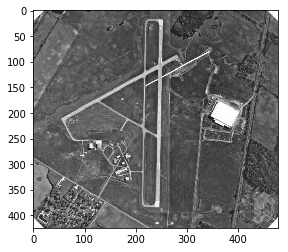

In [34]:
hough_image = cv2.imread('mnn4-runway-Ohio.jpg',0)
plt.imshow(hough_image,cmap='gray')

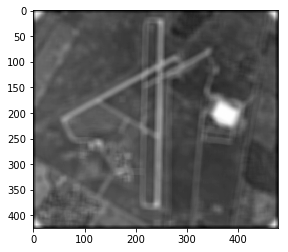

In [35]:
kernel5X5 = np.ones((13,13),np.float32)/169
smooth_hough_image = convolve2d(hough_image,kernel5X5,13)
plt.imshow(smooth_hough_image,cmap='gray')

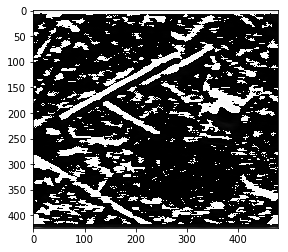

In [36]:
yderivimg = convolve2d(smooth_hough_image,yderiv,3)
plt.imshow(yderivimg,cmap='gray')

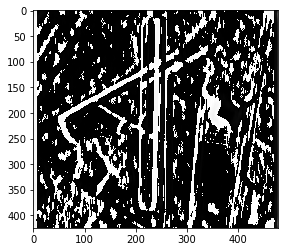

In [37]:
xderivimg = convolve2d(smooth_hough_image,xderiv,3)
plt.imshow(xderivimg,cmap='gray')

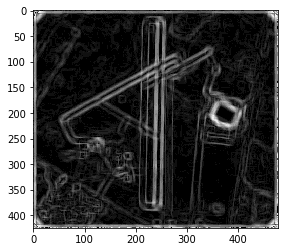

In [38]:
edgeMapImage = calculateEdgeMap(xderivimg,yderivimg)
edgeMapImage = (edgeMapImage / np.max(edgeMapImage)) * 255
edgeMapImage = edgeMapImage.astype(int) # this is an important step
plt.imshow(edgeMapImage,cmap='gray')

In [39]:
def thresholding(image, threshold):
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] < threshold :
                output[i][j] = 0
            else :
                output[i][j] = 255 #image[i][j]
    return output

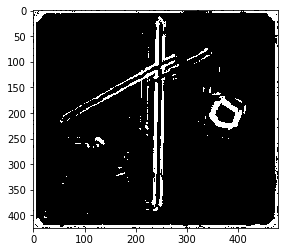

In [40]:
thresholdImage = thresholding(edgeMapImage,100)
plt.imshow(thresholdImage,cmap='gray')

In [41]:
def houghTransform(image):
    diag = math.sqrt(math.pow(image.shape[0],2) + math.pow(image.shape[1],2))
    diag = int(diag)
    accumulator = np.zeros((diag,180))
    rho = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] != 0:
                for theta in range(0,180):
                    rho = int(i * math.cos(math.radians(theta)) + j* math.sin(math.radians(theta)))
                    accumulator[rho][theta] = accumulator[rho][theta] + 1
    return accumulator

In [42]:
acc = houghTransform(thresholdImage)

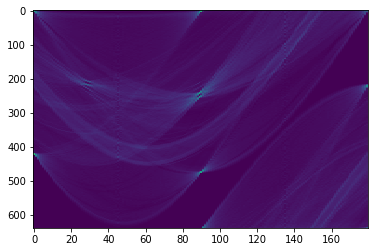

In [43]:
plt.imshow(acc,aspect='auto')

In [44]:
def findPeaksIndices(accumulator):
    output = []
    for i in range(accumulator.shape[0]):
        for j in range(accumulator.shape[1]):
            if accumulator[i][j] != 0 :
                output.append((i,j))
    return output

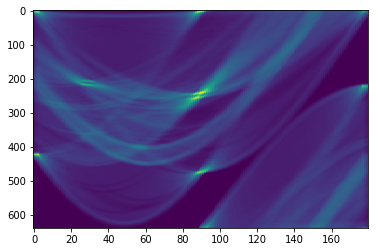

In [45]:
acck = np.ones((5,5),np.float32)/25
smoothed_acc = convolve2d(acc, acck, 5)
plt.imshow(smoothed_acc,aspect='auto')

In [46]:
def nonMaximumSeparation(accumulator):
    indices = []
    output = np.zeros_like(accumulator)
    for i in range(1,accumulator.shape[0]-1):
        for j in range(1,accumulator.shape[1]-1):
            # if i am maximum in neighborhood, keep me, else make me 0
            me, up , down , left , right = accumulator[i][j] ,accumulator[i-1][j] \
            , accumulator[i+1][j] , accumulator[i][j-1], accumulator[i][j+1]
            upleft, upright, bottomleft, bottomright = accumulator[i-1][j-1] \
            , accumulator[i-1][j+1],accumulator[i+1][j-1],accumulator[i+1][j+1]
            #print up,down,left,right
            if me >= up and me >= down and me>=left and me>=right and me >=upleft and me>=upright \
            and me>=bottomleft and me>=bottomright:
                continue
                #output[i][j] = me
            else:
                indices.append((i,j))
                #output[i][j] = 0
    for point in indices:
        accumulator[point[0]][point[1]] = 0
    return accumulator


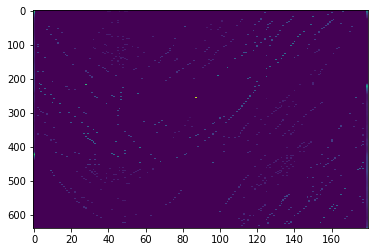

In [47]:
edgyacc = nonMaximumSeparation(smoothed_acc)
plt.imshow(edgyacc,aspect='auto')

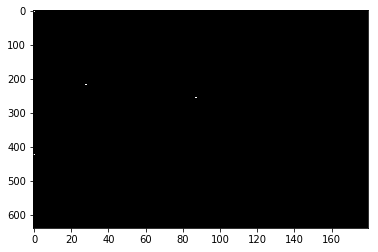

In [48]:
threshold_acc = thresholding(edgyacc,137)
plt.imshow(threshold_acc,aspect='auto',cmap='gray')

In [49]:
peaklist = findPeaksIndices(threshold_acc)
print peaklist

[(0, 91), (0, 92), (2, 91), (2, 177), (3, 0), (4, 0), (5, 0), (5, 2), (218, 28), (223, 177), (242, 90), (256, 87), (421, 0), (422, 0), (422, 2), (423, 0), (424, 0), (475, 89), (636, 93)]


In [50]:
def houghLines(peaklist,image):
    for point in peaklist:
        rho = point[0]
        theta = point[1]
        sintheta = math.sin(math.radians(theta))
        costheta = math.cos(math.radians(theta))
        if theta != 0:
            y1 = int(rho/sintheta)
            y2 = int((rho - image.shape[0]*costheta)/sintheta)
            cv2.line(image,(y1,0),(y2,image.shape[0]),(0,255,0),5)

In [51]:
peaklist = findPeaksIndices(threshold_acc)
print peaklist

[(0, 91), (0, 92), (2, 91), (2, 177), (3, 0), (4, 0), (5, 0), (5, 2), (218, 28), (223, 177), (242, 90), (256, 87), (421, 0), (422, 0), (422, 2), (423, 0), (424, 0), (475, 89), (636, 93)]


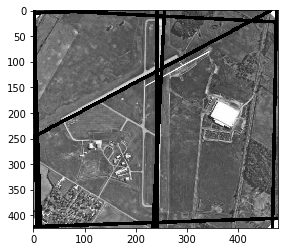

In [52]:
test_hough_image = cv2.imread('mnn4-runway-Ohio.jpg',0)
houghLines(peaklist,test_hough_image)
plt.imshow(test_hough_image,cmap='gray')

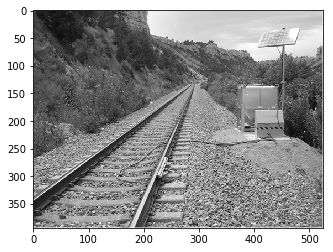

In [53]:
hough_image2 = test_hough_image = cv2.imread('two.png',0)
plt.imshow(hough_image2,cmap='gray')

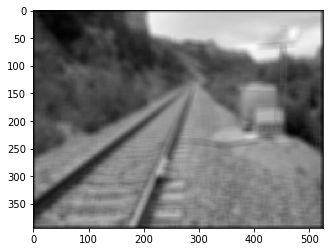

In [54]:
smooth_hough_image = convolve2d(hough_image2,kernel5X5,13)
plt.imshow(smooth_hough_image,cmap='gray')

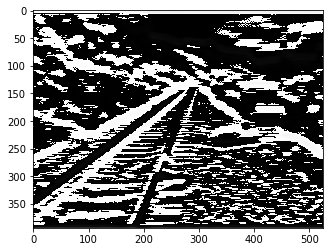

In [55]:
yderivimg = convolve2d(smooth_hough_image,yderiv,3)
plt.imshow(yderivimg,cmap='gray')

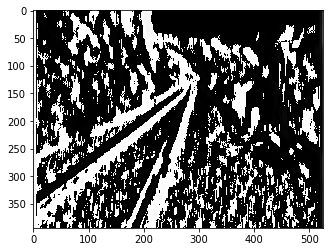

In [56]:
xderivimg = convolve2d(smooth_hough_image,xderiv,3)
plt.imshow(xderivimg,cmap='gray')

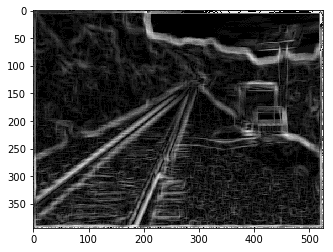

In [57]:
edgeMapImage = calculateEdgeMap(xderivimg,yderivimg)
edgeMapImage = (edgeMapImage / np.max(edgeMapImage)) * 255
edgeMapImage = edgeMapImage.astype(int) # this is an important step
plt.imshow(edgeMapImage,cmap='gray')

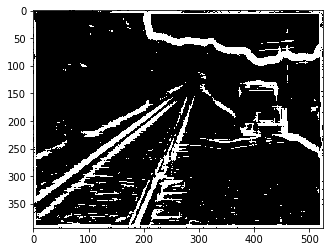

In [58]:
thresholdImage = thresholding(edgeMapImage,80)
plt.imshow(thresholdImage,cmap='gray')

In [59]:
acc = houghTransform(thresholdImage)

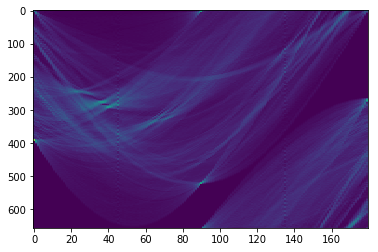

In [60]:
plt.imshow(acc,aspect='auto')

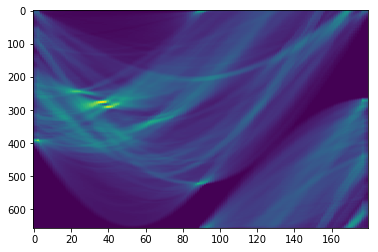

In [61]:
acck = np.ones((5,5),np.float32)/25
smoothed_acc = convolve2d(acc, acck, 5)
plt.imshow(smoothed_acc,aspect='auto')

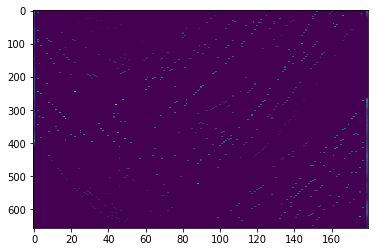

In [62]:
edgyacc = nonMaximumSeparation(smoothed_acc)
plt.imshow(edgyacc,aspect='auto')

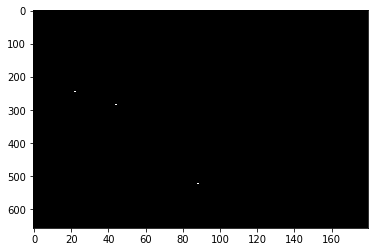

In [63]:
threshold_acc = thresholding(edgyacc,182)
plt.imshow(threshold_acc,aspect='auto',cmap='gray')

In [64]:
peaklist = findPeaksIndices(threshold_acc)
print peaklist

[(2, 91), (2, 169), (245, 22), (276, 37), (282, 44), (284, 44), (291, 40), (336, 63), (391, 0), (391, 2), (522, 88)]


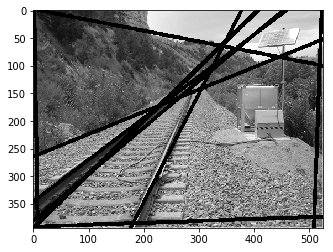

In [65]:
test_hough_image2 = test_hough_image = cv2.imread('two.png',0)
houghLines(peaklist,test_hough_image2)
plt.imshow(test_hough_image2,cmap='gray')